In [27]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from glob import glob
import json
from tqdm import tqdm
import re

In [18]:

df=pd.read_csv('../../data/file_pid_newname.csv')
filtered_df =df[df['is_seed'] == True]
subtypes=["BRNT","BRLC","BRDC","BRIL","BRID","STNT","STIN","STDI","STMX"]
pid_list=[]
for i in range(len(subtypes)):
    filtered1_df=filtered_df[filtered_df['new_name'].str.contains(subtypes[i])]
    unique_p_id_count = filtered1_df['p_id'].nunique()
    pid_list.append(unique_p_id_count)
    print(subtypes[i],unique_p_id_count)


BRNT 1938
BRLC 158
BRDC 290
BRIL 108
BRID 1093
STNT 380
STIN 503
STDI 495
STMX 200


In [47]:
val_json_list=glob('../../data/원시/011.유방암 병리 이미지 및 판독문 합성 데이터/**/2.라벨링/**/*.json')
val_image_list=[f.replace('2.라벨링', '1.원시데이터') for f in val_json_list]
val_image_list=[f.replace('.json', '.png') for f in val_image_list]
val_caption_list=[]
for i in tqdm(range(len(val_image_list))):

    with open(val_json_list[i], 'r', encoding='utf-8-sig') as file:
        data = json.load(file)
    val_caption_list.append(str(data['content']['file']['patch_discription']))

100%|██████████| 8000/8000 [02:59<00:00, 44.47it/s]


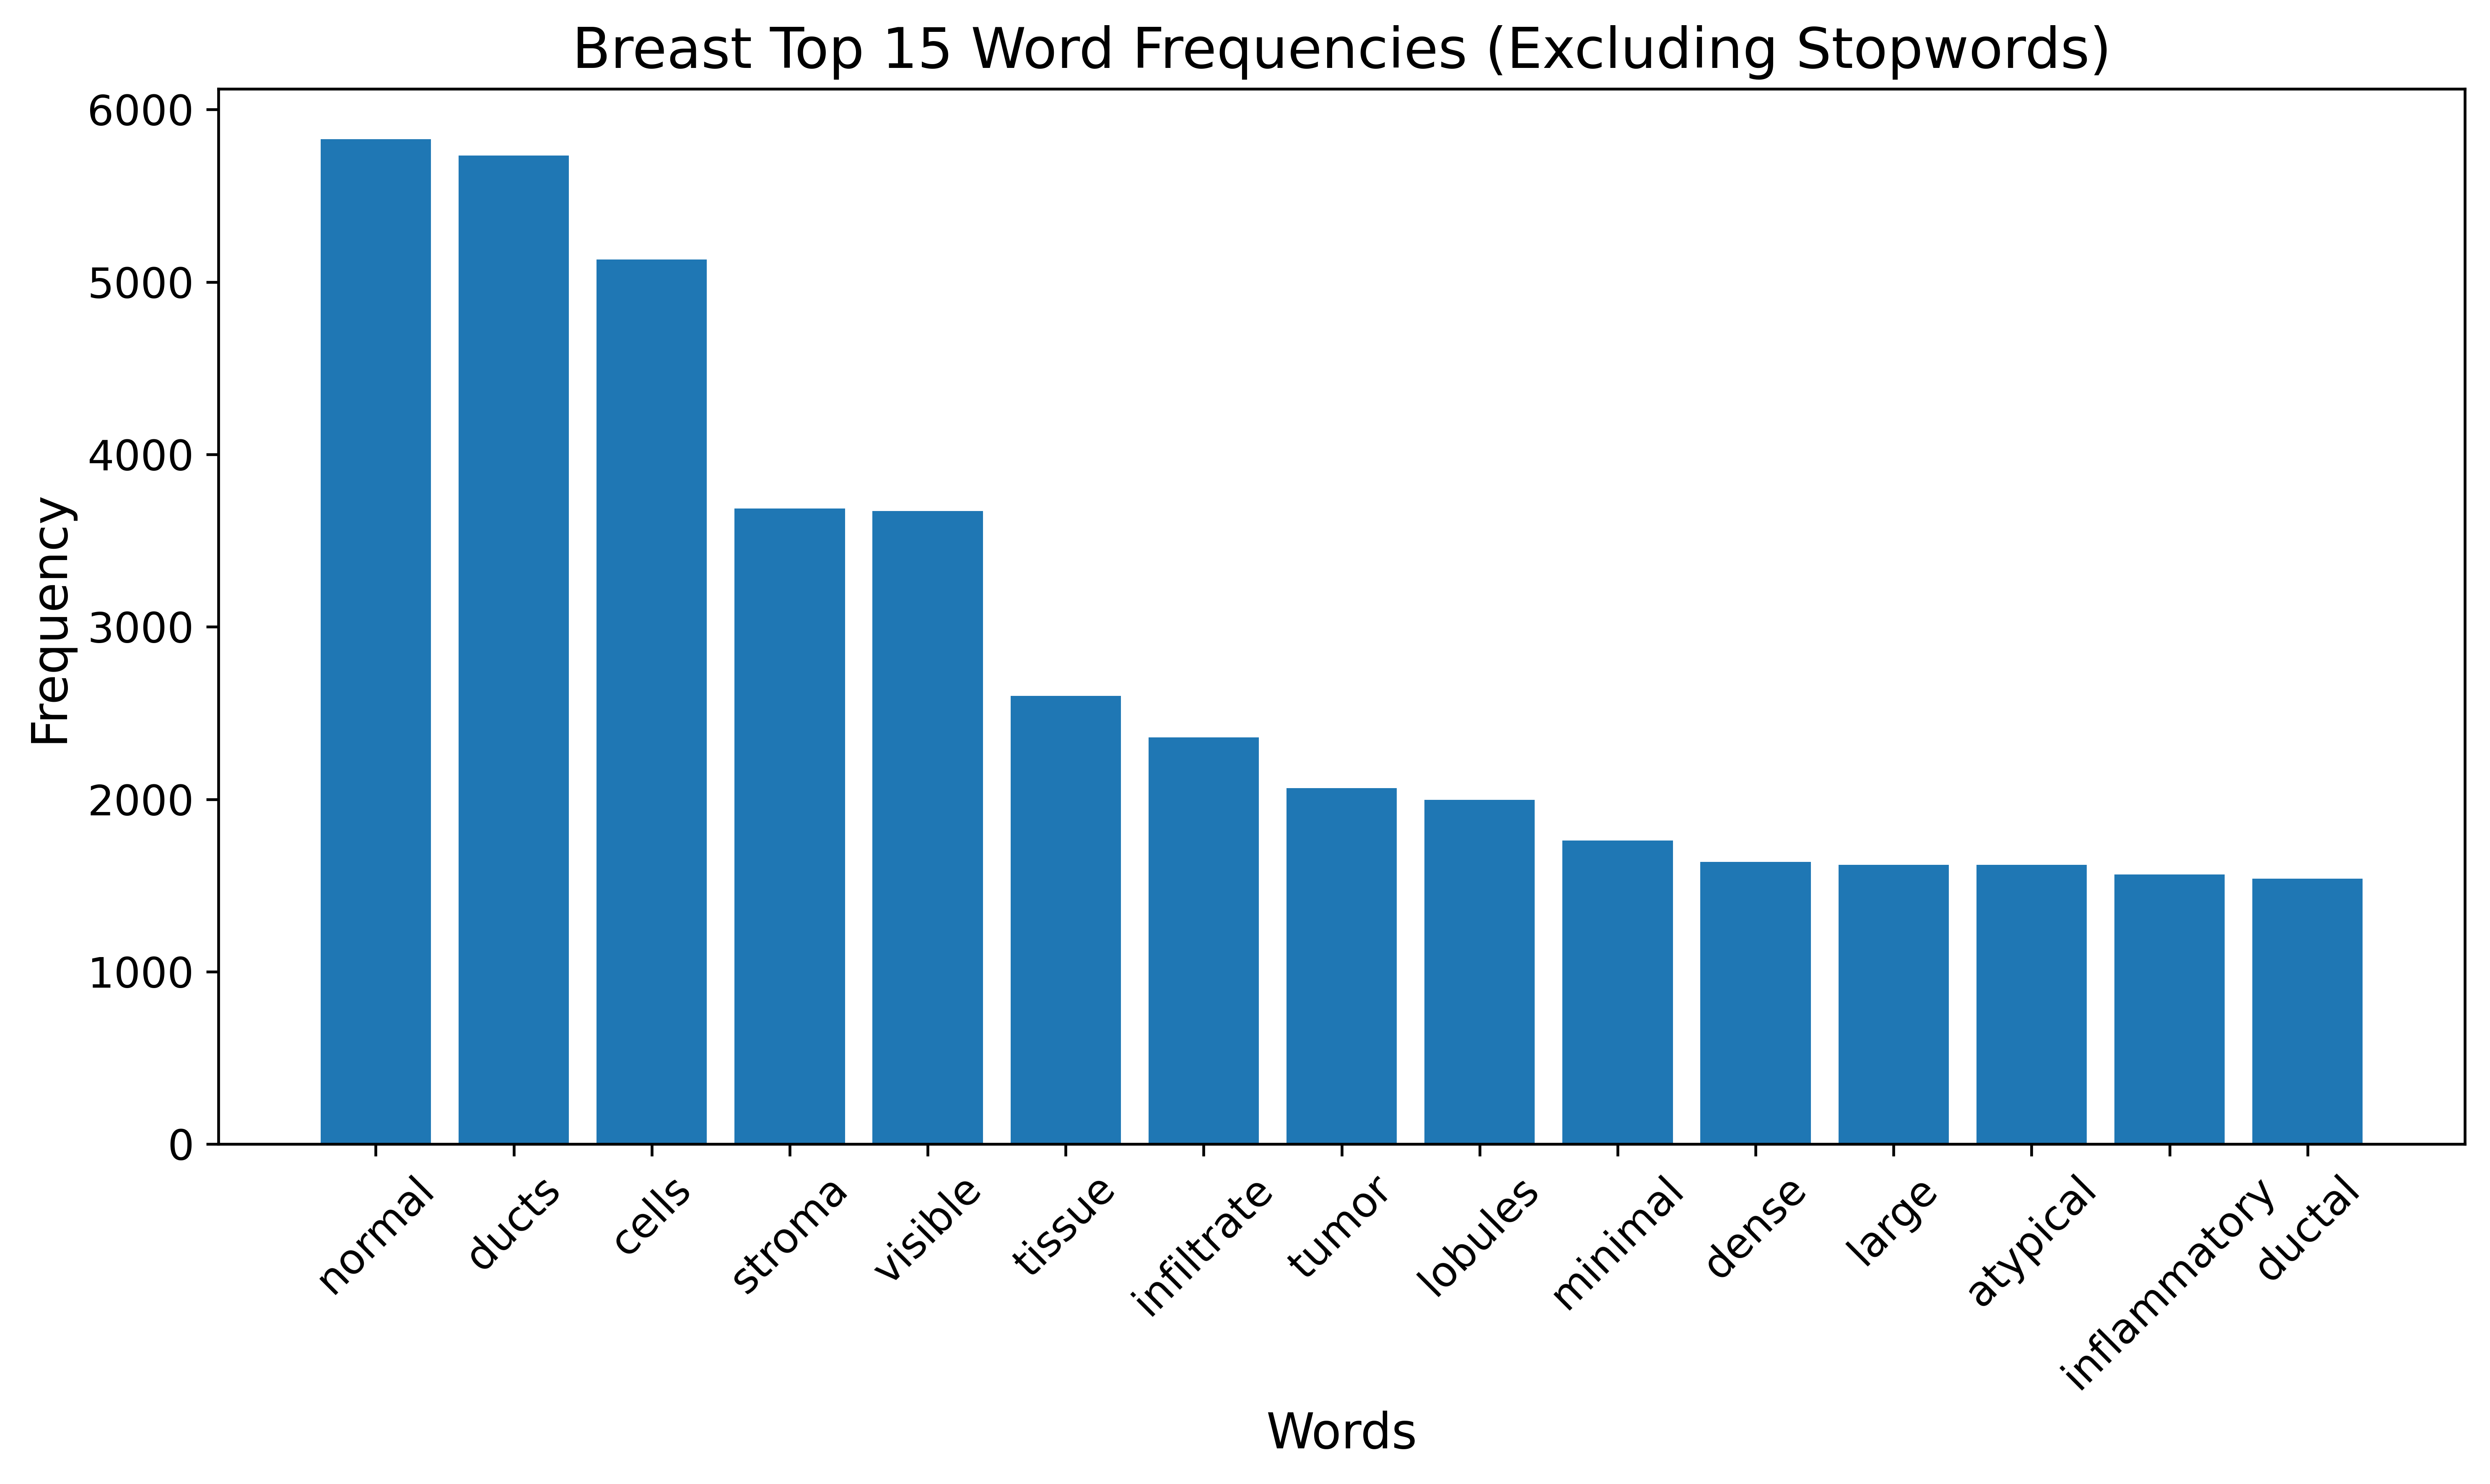

In [48]:
stopwords = {"50","a", "is", "in", "on", "and", "the", "has", "are", "of","with","to","for","an","as","at","by","from","that","this","which","it","be","been","or","was","were","not","no","can","could","may","might","shall","should","will","would","have","has","had","do","does","did","but","if","so","such","than","too","very","s","t","just","only","up","out","about","over","after","before","between","under","above","below","same","different","both","either","neither","each","every","all","most","some","few","other","another","more","less","own","other","others"}
all_words = [
    word for caption in val_caption_list
    for word in re.findall(r'\b\w+\b', caption.lower())  # 단어만 추출
    if word not in stopwords  # 불용어 제거
]
import matplotlib.colors as mcolors
# 단어 빈도 계산
word_counts = Counter(all_words)
pastel_colors = list(mcolors.TABLEAU_COLORS.values())
# 빈도 상위 10개 단어 추출
most_common_words = word_counts.most_common(15)

# 데이터 시각화
words, counts = zip(*most_common_words)  # 단어와 빈도 분리
plt.figure(figsize=(10, 6), dpi=600)  # DPI 설정 및 크기 조정

# 막대 그래프 생성
plt.bar(words, counts)
plt.xlabel("Words", fontsize=14)  # 글씨 크기 설정
plt.ylabel("Frequency", fontsize=14)
plt.title("Breast Top 15 Word Frequencies (Excluding Stopwords)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()



# 그래프 출력
plt.show()